<a href="https://colab.research.google.com/github/bamboo0727/Neural-Network-Model/blob/master/CIFAR10_Image_Classification(88_20_accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.utils import np_utils 


Using TensorFlow backend.


In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 13s 0us/step


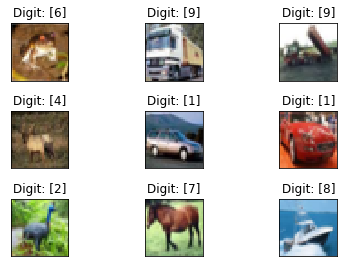

In [0]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
X_train.shape, Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
X_test.shape, Y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
print(X_train.shape)

(50000, 32, 32, 3)


In [0]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#build first 32 filters layer with input_shape=(32, 32, 3) 
model.add(Conv2D(64, (3, 3), activation='relu'))
#add second 64 filters layer
model.add(MaxPool2D(pool_size=(2, 2)))
#add pooling layer 
model.add(Flatten())
# flatten output data to 1D
model.add(Dropout(0.2))
#add Dropout layer in randomly setting a fraction 0.2 rate of input units  which helps prevent overfitting.


model.add(Dense(512, activation='relu'))
#add fully connect layer with 512 neurons
model.add(Dropout(0.2))
#add dropout layer again
model.add(Dense(num_classes, activation='softmax'))
#output layer with 'softmax' to classifier num_classes' labels
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#compile model with parameters 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6423040   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [0]:
model.fit(X_train, Y_train,batch_size=32,
          epochs=10, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 698us/step - loss: 1.4058 - acc: 0.4956 - val_loss: 1.0883 - val_acc: 0.6193
Epoch 2/10
40000/40000 [==============================] - 23s 568us/step - loss: 1.0110 - acc: 0.6429 - val_loss: 0.9546 - val_acc: 0.6639
Epoch 3/10
40000/40000 [==============================] - 23s 570us/step - loss: 0.8261 - acc: 0.7101 - val_loss: 0.9278 - val_acc: 0.6794
Epoch 4/10
40000/40000 [==============================] - 23s 565us/step - loss: 0.6603 - acc: 0.7680 - val_loss: 0.9246 - val_acc: 0.6886
Epoch 5/10
40000/40000 [==============================] - 23s 570us/step - loss: 0.4966 - acc: 0.8263 - val_loss: 0.9602 - val_acc: 0.6931
Epoch 6/10
40000/40000 [==============================] - 23s 570us/step - loss: 0.3722 - acc: 0.8703 - val_loss: 1.0942 - val_acc: 0.6847
Epoch 7/10
40000/40000 [==============================] - 23s 572us/

In [0]:
scores = model.evaluate(X_test,Y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 69.03%


In [0]:
#Create the model now
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (32,32,3), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

epochs = 10 
lrate = 0.01

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, Y_train, epochs=epochs, batch_size=32)
scores = model.evaluate(X_test,Y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D

In [0]:
model2 = Sequential()
keras.initializers.he_normal(seed=None)

model2.add(Conv2D(64, (3, 3),input_shape = (32,32,3), strides=1,padding='same',activation = 'relu',kernel_initializer='he_normal'))
model2.add(Conv2D(64, (3, 3), strides=1, padding='same',activation = 'relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))

model2.add(Conv2D(128, (3, 3), strides=1,padding='same',activation = 'relu',kernel_initializer='he_normal'))
model2.add(Conv2D(128, (3, 3), strides=1, padding='same',activation = 'relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))

model2.add(Conv2D(256, (3, 3), strides=1,padding='same',activation = 'relu',kernel_initializer='he_normal'))
model2.add(Conv2D(256, (3, 3), strides=1, padding='same',activation = 'relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))

model2.add(Flatten())
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax',kernel_initializer='he_normal'))

model2.summary ()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
__________

In [0]:
# Let's train the model 
model2.compile(loss='categorical_crossentropy',
                            optimizer='adadelta',
                            metrics=['accuracy'])

print("train____________")
model2.fit(X_train,Y_train,epochs=100,batch_size=256,validation_split=0.2)
print("test_____________")
loss,acc=model2.evaluate(X_test,Y_test)
print("loss=",loss)
print("accuracy=",acc)

train____________
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 21s 531us/step - loss: 2.1127 - acc: 0.2283 - val_loss: 1.6403 - val_acc: 0.4017
Epoch 2/100
40000/40000 [==============================] - 19s 472us/step - loss: 1.6452 - acc: 0.4063 - val_loss: 1.4152 - val_acc: 0.4813
Epoch 3/100
40000/40000 [==============================] - 19s 472us/step - loss: 1.3596 - acc: 0.5219 - val_loss: 1.1368 - val_acc: 0.5933
Epoch 4/100
40000/40000 [==============================] - 19s 472us/step - loss: 1.1483 - acc: 0.5993 - val_loss: 1.2267 - val_acc: 0.5617
Epoch 5/100
40000/40000 [==============================] - 19s 469us/step - loss: 0.9842 - acc: 0.6602 - val_loss: 0.9658 - val_acc: 0.6728
Epoch 6/100
40000/40000 [==============================] - 19s 471us/step - loss: 0.8330 - acc: 0.7138 - val_loss: 0.8498 - val_acc: 0.7093
Epoch 7/100
40000/40000 [==============================] - 19s 471us/step - loss: 0.7163 - a

In [0]:
aug_gen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False,  # randomly flip images
)



In [0]:
aug_gen.fit(X_train)
gen = aug_gen.flow(X_train, Y_train, batch_size=256)
h = model2.fit_generator(generator=gen, steps_per_epoch=2000, epochs=20, validation_data=(X_test, Y_test))
model2.save('CIFAR10_model_with_data_augmentation.h5')


In [0]:
loss, accuracy = model2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (accuracy * 100, loss))
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (accuracy * 100, loss))

Training Accuracy = 98.22 %     loss = 0.074902
Testing Accuracy = 88.20 %    loss = 0.788014


conclusion: I try three different structure network and get higher score with VGG structure (accuracy= 0.7904), after regular training , I try Further Training with Data Augmentation provide better accuracy 88.20%.However , during the training processing, the hardware of my computer  can not have the dual GPU function . That's why I only choose 20 epoch and steps_per_epoch=2000(suppose 10000).
